In [86]:
import numpy as np
from matplotlib import pyplot as plt

In [87]:
fig_time = plt.figure()
fig_freq = plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [88]:
def time2freq():
    global time_x, time_y
    global freq_x, freq_y

    d = np.diff(time_x).mean()
    shift_time = time_x[0]

    freq_y = np.fft.fft(time_y)
    freq_x = np.fft.fftfreq(len(freq_y),d = d)
    freq_y *= np.exp(-2j*np.pi*freq_x*shift_time)

    freq_y = np.fft.fftshift(freq_y)
    freq_x = np.fft.fftshift(freq_x)

def freq2time(refer_time=False):
    global time_x, time_y
    global freq_x, freq_y

    freq_y_mem = freq_y.copy()

    if refer_time:
        shift_time = time_x[0]
        freq_y_mem *= np.exp(2j*np.pi*freq_x*shift_time)
        duration = (len(freq_x)-1.0)/(np.max(freq_x) - np.min(freq_x))
        assert 0.99 <duration/(np.max(time_x)-np.min(time_x)) < 1.01
    else:
        sampling_freq = (np.max(freq_x) - np.min(freq_x))*len(freq_x)/(len(freq_x)-1)
        duration = (len(freq_x)-1.0)/(np.max(freq_x) - np.min(freq_x))
        time_x = np.linspace(0,duration,len(freq_x))

    freq_y_shift = np.fft.ifftshift(freq_y_mem)
    time_y = np.fft.ifft(freq_y_shift)


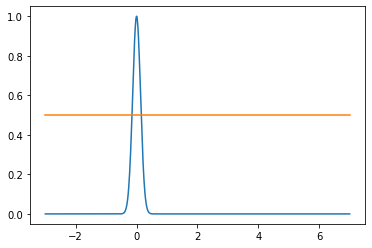

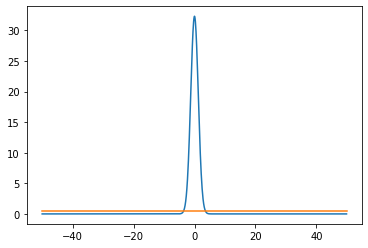

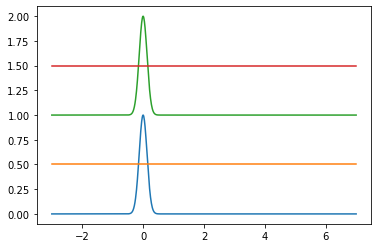

In [89]:

time_x = np.linspace(0,10,1000) - 3 # d, shift time
time_y = np.exp(-(time_x)**2*30)

plt.get_current_fig_manager().canvas.figure = fig_time
plt.plot(time_x, time_y.real)
plt.plot(time_x, time_y.imag + 0.5)
plt.show()

time2freq()

plt.get_current_fig_manager().canvas.figure = fig_freq
plt.plot(freq_x, freq_y.real)
plt.plot(freq_x, freq_y.imag+0.5)
plt.show()


freq2time(refer_time=True)

plt.get_current_fig_manager().canvas.figure = fig_time
plt.plot(time_x, time_y.real+1)
plt.plot(time_x, time_y.imag + 1.5)
plt.show()